# EE658/758 Machine Learning in Engineering
# Assignment #1: Linear Regression
## Spring 2023

In [1]:
# Zachary Chou 
#1 Import libraries numpy, pandas, matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#2 Read the csv file: "insurance.csv"
df = pd.read_csv('insurance.csv')

print(df.to_string()) 

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
5      31  female  25.7         0     no  southeast   3756.62
6      46  female  33.4         1     no  southeast   8240.59
7      37  female  27.7         3     no  northwest   7281.51
8      37    male  29.8         2     no  northeast   6406.41
9      60  female  25.8         0     no  northwest  28923.14
10     25    male  26.2         0     no  northeast   2721.32
11     62  female  26.3         0    yes  southeast  27808.73
12     23    male  34.4         0     no  southwest   1826.84
13     56  female  39.8         0     no  southeast  11090.72
14     27    male  42.1         0    yes  southeast  39611.76
15     1

In [3]:
#3 Show a sample of the data (first 10 rows)
df = pd.read_csv('insurance.csv')

print(df.head(10))

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
5   31  female  25.7         0     no  southeast   3756.62
6   46  female  33.4         1     no  southeast   8240.59
7   37  female  27.7         3     no  northwest   7281.51
8   37    male  29.8         2     no  northeast   6406.41
9   60  female  25.8         0     no  northwest  28923.14


In [4]:
#4 Show some statistics about the data
bmi = df['bmi'].tolist()

x = np.mean(bmi)

y = np.median(bmi)

print(df.describe())

print('mean of bmi is: ',x)

print('median of bmi is: ',y)

               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000
mean of bmi is:  30.66547085201794
median of bmi is:  30.4


In [5]:
#5 Show info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#6 Convert the categorical values (columns with text data) into numerical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['smoker'] = le.fit_transform(df.smoker)

df.smoker.value_counts()

le1 = LabelEncoder()
df['sex'] = le1.fit_transform(df.sex)

le2 = LabelEncoder()
df['region'] = le2.fit_transform(df.region)

print(df)

df.info()

print(df.sex.value_counts()) # 0 = female, 1 = male
print(df.smoker.value_counts()) # 0 = no, 1 = yes
print(df.region.value_counts()) # 3 = southwest, 2 = southeast, 1 = northwest, 0 = northeast 

      age  sex   bmi  children  smoker  region  expenses
0      19    0  27.9         0       1       3  16884.92
1      18    1  33.8         1       0       2   1725.55
2      28    1  33.0         3       0       2   4449.46
3      33    1  22.7         0       0       1  21984.47
4      32    1  28.9         0       0       1   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    1  31.0         3       0       1  10600.55
1334   18    0  31.9         0       0       0   2205.98
1335   18    0  36.9         0       0       2   1629.83
1336   21    0  25.8         0       0       3   2007.95
1337   61    0  29.1         0       1       1  29141.36

[1338 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null 

In [7]:
#7 Based on this data, what looks to be the most correlated feature with "Expenses"? (Justify your answer)
# print(df.head(20))
# print(df.tail(20))

print(df['age'].corr(df['expenses']))

print(df['sex'].corr(df['expenses']))

print(df['bmi'].corr(df['expenses']))

print(df['children'].corr(df['expenses']))

print(df['smoker'].corr(df['expenses']))

print(df['region'].corr(df['expenses']))

# When comparing each of the x columns with the y column, the highest correlation value is smoker. Meaning,
# smoker has the most impact on expenses when compared to each of the x column items. 

0.29900819228508274
0.05729206999169409
0.19857625501893203
0.06799823000532818
0.7872514298985526
-0.006208222496482284


In [8]:
#8 Assign the customer’s features data to the variable "X” and assign the label feature (expenses) to the variable "y"
# df.info()

# y_col = 'expenses'
# y = df[y_col]
# X = df[df.columns.drop(y_col)]

# # print(X)

# #print(y)

# df.drop(['age','sex','children','smoker','region'],axis=1)

# # y_col = 'expenses'
# # y = df[y_col]

# print(y)

# x = 'bmi'
# X = df[x]

# print(X)

X = df.loc[:,['age','sex','bmi','children','smoker','region']].values

y = df.loc[:,['expenses']].values 

print(X)

print(y)

[[19.   0.  27.9  0.   1.   3. ]
 [18.   1.  33.8  1.   0.   2. ]
 [28.   1.  33.   3.   0.   2. ]
 ...
 [18.   0.  36.9  0.   0.   2. ]
 [21.   0.  25.8  0.   0.   3. ]
 [61.   0.  29.1  0.   1.   1. ]]
[[16884.92]
 [ 1725.55]
 [ 4449.46]
 ...
 [ 1629.83]
 [ 2007.95]
 [29141.36]]


In [9]:
#9 Convert the X and Y DataFrames to arrays

# arr = X.to_numpy()
# print(arr)

# arr1 = y.to_np()
# print(arr1)

# df[['bmi','age']].to_numpy()
data = pd.DataFrame(X)

X = data.to_numpy()

display(X)  # X 

Data = pd.DataFrame(y)

y = Data.to_numpy()

display(y) # y



array([[19. ,  0. , 27.9,  0. ,  1. ,  3. ],
       [18. ,  1. , 33.8,  1. ,  0. ,  2. ],
       [28. ,  1. , 33. ,  3. ,  0. ,  2. ],
       ...,
       [18. ,  0. , 36.9,  0. ,  0. ,  2. ],
       [21. ,  0. , 25.8,  0. ,  0. ,  3. ],
       [61. ,  0. , 29.1,  0. ,  1. ,  1. ]])

array([[16884.92],
       [ 1725.55],
       [ 4449.46],
       ...,
       [ 1629.83],
       [ 2007.95],
       [29141.36]])

In [10]:
#10 Using the train_test_split function, split the data into a training data set, and a test data set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

print("X_train=", X_train)
print("X_test=", X_test)
print("y_train=", y_train)
print("y_test=", y_test)

X_train= [[61.   1.  33.9  0.   0.   0. ]
 [47.   0.  36.6  1.   1.   2. ]
 [54.   0.  27.6  1.   0.   1. ]
 ...
 [20.   1.  39.4  2.   1.   3. ]
 [45.   1.  36.5  2.   1.   1. ]
 [32.   0.  41.1  0.   0.   3. ]]
X_test= [[59.   1.  41.1  1.   1.   2. ]
 [33.   0.  18.5  1.   0.   3. ]
 [44.   0.  32.3  1.   0.   2. ]
 ...
 [54.   1.  25.1  3.   1.   3. ]
 [38.   1.  19.3  0.   1.   3. ]
 [39.   1.  34.1  2.   0.   2. ]]
y_train= [[13143.86]
 [42969.85]
 [11305.93]
 [ 9301.89]
 [14119.62]
 [10797.34]
 [ 5125.22]
 [ 2138.07]
 [37079.37]
 [ 2156.75]
 [ 1712.23]
 [ 3213.62]
 [27533.91]
 [38746.36]
 [ 6877.98]
 [ 7418.52]
 [ 2331.52]
 [46889.26]
 [ 1137.47]
 [40720.55]
 [34672.15]
 [40273.65]
 [20630.28]
 [17085.27]
 [32787.46]
 [ 1824.29]
 [ 5584.31]
 [ 3227.12]
 [ 7050.64]
 [ 7173.36]
 [ 9386.16]
 [ 7749.16]
 [30063.58]
 [ 1263.25]
 [ 6875.96]
 [ 5383.54]
 [18328.24]
 [ 3578.  ]
 [48673.56]
 [ 2020.55]
 [12829.46]
 [12333.83]
 [ 3077.1 ]
 [41949.24]
 [ 6571.54]
 [ 5209.58]
 [ 8334.59]
 [

In [11]:
#11 Import LinearRegression from sklearn.linear_model and create an instance of a LinearRegression() model named.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [12]:
#12 Fit the model to the training data
# lm.fit(X_train.values.reshape(-1,1),y_train.values.respahe(-1,1))
lm.fit(X_train,y_train)

LinearRegression()

In [13]:
#13 Print the linear model's intercept and coefficients
print("Intercept:", lm.intercept_)
print('Coefficient:', lm.coef_)

Intercept: [-10793.06903081]
Coefficient: [[  260.73332869  -274.40451298   290.12298024   484.74476137
  23944.21710507  -212.81846521]]


In [14]:
#14 Use the trained model to predict the test data set
# predictions = lm.predict(X_test.values.reshape(-1,1))
# lm.score(X_test.values.reshape(-1,1), y_test)

predictions = lm.predict(X_test)
lm.score(X_test, y_test)

0.7627800320679834

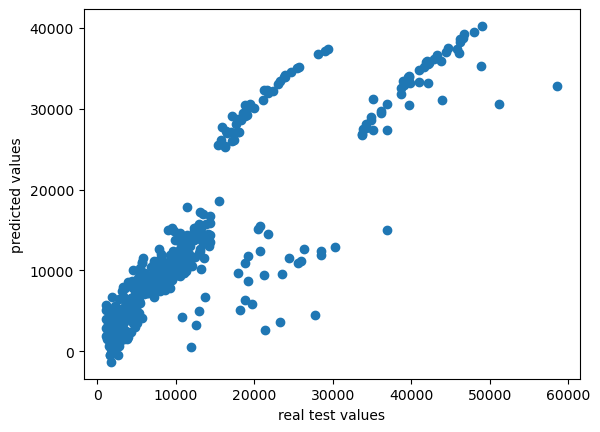

In [15]:
#15 Create a scatterplot of the real test values versus the predicted values
# plt.subplot(1,2,2)
# plt.plot(X_test,predictions, label = 'Linear Regression', color = 'r')
# plt.plot(X_test,y_test, label = 'Test Data', color = 'b', alpha = .7)
# plt.legend()


# plt.subplot(1,2,1)
# plt.plot(X_train, y_train, label = 'Training Data', color = 'r', alpha = .7)
# plt.plot(X_test, y_test, label = 'Testing Data', color = 'b', alpha = .6)
# plt.legend()

# plt.tight_layout()

# plt.show()

# plt.scatter(X,y)
plt.scatter(y_test,predictions)
plt.xlabel('real test values')
plt.ylabel('predicted values')
plt.show()

In [16]:
#16 Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error is: ',RMSE)

MSE = mean_squared_error(y_test, predictions)
print('Mean Squared Error is: ',MSE)

MAE = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error is: ',MAE)

Root Mean Squared Error is:  5938.589253595288
Mean Squared Error is:  35266842.32291744
Mean Absolute Error is:  4101.399580387141


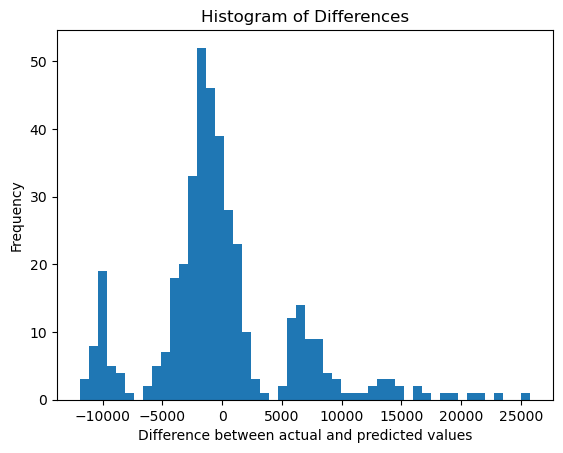

In [17]:
#17 Show a histogram of the difference between the actual and predicted value of the test data set.
#difference = predictions - y_test

difference = y_test - predictions
plt.hist(difference, bins = 50)

plt.xlabel('Difference between actual and predicted values')
plt.ylabel('Frequency')
plt.title('Histogram of Differences')
plt.show()

In [18]:
#18 Explain the meaning or significance of the coefficients of the model
# The higher the coefficient, the more impact that the value has on the values that one wants to predict, in this case expenses
# since the coefficient acts as a multiple of the value one wants to predict, in this case expenses. 

In [26]:
#19 Use your own implementation of the Batch Gradient Descent to find the intercept and coefficients of the linear regression model
import numpy as np 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

X_b = np.c_[np.ones((1338,0)),X]
alpha = 0.1
n_iterations = 1000
m = 100
W = np.random.randn(6,1338)
for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(W) - y)
    W_batch = W - alpha * gradients
print("\nBGD result is: \n",W_batch) 


BGD result is: 
 [[765794.07471151 762145.68172698 766267.85703586 ... 760935.08390468
  763175.32054558 767183.33970311]
 [  9455.58637066   9410.83139783   9461.06644275 ...   9396.00727764
    9424.1367778    9470.63875572]
 [565412.13094297 562648.51649649 565737.29737731 ... 561768.18224192
  563390.99226668 566359.94629725]
 [ 20812.81757893  20715.97880915  20825.25696011 ...  20685.19565671
   20742.88315241  20849.04522296]
 [  8791.20915338   8772.01107801   8793.1311477  ...   8766.20574236
    8776.72317316   8796.45744506]
 [ 26864.7192818   26731.13029393  26880.95118123 ...  26688.27672833
   26767.9825437   26911.79167032]]


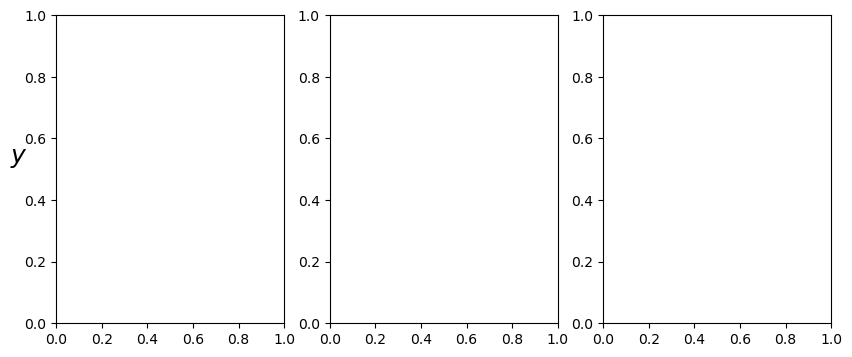

In [20]:
#20 Demonstrate the effect of using different Learning Rate parameter
def plot_gradient_descent(W, alpha):
    
     np.random.seed(402)
W = np.random.randn(402,6)
X_test = np.array([[6], [402]])
X_test_b = np.c_[np.ones((2,1)), X_test]
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(W, alpha =0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(W, alpha=0.1)
plt.subplot(133); plot_gradient_descent(W, alpha=0.9)
plt.show()

In [27]:
#21 Compare the results attained from using the Scikit-Learn library implementation and the one from your own implementation
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

print("\nBGD result is: \n",W_batch)  

display(sgd_reg.intercept_)
display(sgd_reg.coef_)


BGD result is: 
 [[765794.07471151 762145.68172698 766267.85703586 ... 760935.08390468
  763175.32054558 767183.33970311]
 [  9455.58637066   9410.83139783   9461.06644275 ...   9396.00727764
    9424.1367778    9470.63875572]
 [565412.13094297 562648.51649649 565737.29737731 ... 561768.18224192
  563390.99226668 566359.94629725]
 [ 20812.81757893  20715.97880915  20825.25696011 ...  20685.19565671
   20742.88315241  20849.04522296]
 [  8791.20915338   8772.01107801   8793.1311477  ...   8766.20574236
    8776.72317316   8796.45744506]
 [ 26864.7192818   26731.13029393  26880.95118123 ...  26688.27672833
   26767.9825437   26911.79167032]]


array([1.33974245e+11])

array([ 2.07017134e+11, -1.24392287e+11, -2.28575398e+11, -1.24951267e+11,
       -1.04813904e+11,  4.50875235e+10])

In [28]:
#22 Use the Stochastic Gradient Descent on the dataset. Compare results with Question the BGD implementation
m = len(X)
np.random.seed(42)
alpha = 0.1
W = np.random.randn(6,1338)
random_index = np.random.randint(m)
xi = X[random_index:random_index+1]
yi = y_train[random_index:random_index+1]
gradients = 2 * xi.T.dot(xi.dot(W) - yi)
W_stochastic = W - alpha * gradients   
print("\nSGD result is: \n", W_stochastic) 

print("\nBGD result is: \n",W_batch)  


SGD result is: 
 [[ 5.34937042e+04  5.42731857e+04  5.35181978e+04 ...  5.42912979e+04
   5.43023290e+04  5.38546910e+04]
 [-3.88176819e-01  1.70416222e-01  1.60573981e-01 ... -5.38841856e-01
  -1.00855468e+00 -1.96262569e+00]
 [ 3.39982548e+04  3.44921477e+04  3.40134716e+04 ...  3.45039447e+04
   3.45115517e+04  3.42280390e+04]
 [ 2.37739682e+03  2.41156861e+03  2.37807695e+03 ...  2.41299559e+03
   2.41407788e+03  2.39393072e+03]
 [ 1.67570106e-01  1.16225960e+00 -5.39591221e-01 ... -9.25392258e-01
  -1.75543790e+00 -6.95149358e-01]
 [ 2.37794903e+03  2.41144482e+03  2.37831997e+03 ...  2.41282457e+03
   2.41232216e+03  2.39361517e+03]]

BGD result is: 
 [[765794.07471151 762145.68172698 766267.85703586 ... 760935.08390468
  763175.32054558 767183.33970311]
 [  9455.58637066   9410.83139783   9461.06644275 ...   9396.00727764
    9424.1367778    9470.63875572]
 [565412.13094297 562648.51649649 565737.29737731 ... 561768.18224192
  563390.99226668 566359.94629725]
 [ 20812.81757893 

In [29]:
#23 Use the Mini Batch Gradient Descent and compare with results with that of the BGD and SGD.
n_iterations = 100
minibatch_size = 20
alpha = 0.1
np.random.seed(42)
W = np.random.randn(6,1338)
shuffled_indices = np.random.permutation(1)
X_b_shuffled = X_train[shuffled_indices]
y_shuffled = y[shuffled_indices]
for j in range(n_iterations):
    for i in range(0, 1, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 1/minibatch_size * xi.T.dot(xi.dot(W) - yi)
        W_mini = W - alpha * gradients
print("\nMBGD result is: \n",W_mini)

print("\nSGD result is: \n", W_stochastic) 

print("\nBGD result is: \n",W_batch) 


MBGD result is: 
 [[ 5.13765913e+03  5.16846204e+03  5.13746326e+03 ...  5.17053216e+03
   5.17119150e+03  5.15376993e+03]
 [ 8.38276006e+01  8.49015688e+01  8.43706653e+01 ...  8.42295065e+01
   8.37751322e+01  8.25303644e+01]
 [ 2.85526450e+03  2.87082127e+03  2.85481744e+03 ...  2.87224145e+03
   2.87318199e+03  2.86451105e+03]
 [-7.90673419e-02 -5.79124110e-01 -4.80833790e-01 ...  3.40295863e-02
   6.13770856e-01  3.75455858e-01]
 [ 1.67570106e-01  1.16225960e+00 -5.39591221e-01 ... -9.25392258e-01
  -1.75543790e+00 -6.95149358e-01]
 [ 4.73145453e-01 -7.02911438e-01 -2.37807037e-01 ... -1.36989578e-01
  -1.14194182e+00  5.99052568e-02]]

SGD result is: 
 [[ 5.34937042e+04  5.42731857e+04  5.35181978e+04 ...  5.42912979e+04
   5.43023290e+04  5.38546910e+04]
 [-3.88176819e-01  1.70416222e-01  1.60573981e-01 ... -5.38841856e-01
  -1.00855468e+00 -1.96262569e+00]
 [ 3.39982548e+04  3.44921477e+04  3.40134716e+04 ...  3.45039447e+04
   3.45115517e+04  3.42280390e+04]
 [ 2.37739682e+03

In [33]:
#24 Perform Normalization on the dataset and repeat the BGD linear regression
# Normalization using rescaling 
def rescale(X):
    min = np.min(X, axis=0)
    max = np.max(X, axis=0)
    X_rescaled = (X - min) / (max - min)
    return X_rescaled, min, max

X_rescaled, min, max = rescale(X)

X_rescaled = (X - min) / (max - min)
X_rescaled_b = np.c_[np.ones((1338,0)), X_rescaled]
y_test_pred = X_rescaled_b.dot(W)

# Implement normalized rescaled data with BGD
import numpy as np 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

X_b = np.c_[np.ones((1338,0)),X]
alpha = 0.1
n_iterations = 1000
m = 100
W = np.random.randn(6,1338)
for iteration in range(n_iterations):
    gradients = 1/m * X_rescaled_b.T.dot(X_b.dot(W) - y_test_pred)
    W_updated_BGD = W - alpha * gradients
print("\nBGD result with normalization is: \n",W_updated_BGD) 


BGD result with normalization is: 
 [[ -3.92568699  35.12295384  37.97657994 ... -16.49043282  52.39161266
  -44.58204906]
 [ -3.34672747  31.90470632  31.60282036 ... -16.62826176  52.96711553
  -44.31447934]
 [ -3.36328041  25.64505179  26.41689874 ... -14.1573886   41.6681127
  -34.81404729]
 [ -2.41051345  13.92363662  14.80973858 ...  -7.49578183  21.78467255
  -18.37987154]
 [ -1.27946427  13.80782763  14.04847117 ...  -6.09841054  21.72578895
  -18.26449828]
 [ -5.1360099   32.64744799  33.02911572 ... -18.48845066  52.91558097
  -43.89244284]]


In [25]:
#25 Use the Normal Equation to solve the linear regression problem
X_b = np.c_[np.ones((1338,1)),X]
W = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(W)

[[-11818.02341588]
 [   257.27248218]
 [  -131.14574742]
 [   332.6448185 ]
 [   479.56455958]
 [ 23819.32186917]
 [  -353.48536976]]


## DUE DATE: Wednesday, February 8, 2023